In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import torch

In [2]:
#creates the environment
env = UnityEnvironment(file_name="./Banana_Linux/Banana.x86_64",no_graphics=True)
# The extracts the first brain's name in the environment
brain_name = env.brain_names[0]
# Extracts the brain object using it's name
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
from dqn_agent import Agent
# initialzing the agent with parameters state size 37, actions size 4 and seed 0
agent = Agent(state_size=37,action_size=4,seed=0)

Episode 100	Average Score: 0.50
Episode 200	Average Score: 3.61
Episode 300	Average Score: 6.82
Episode 400	Average Score: 8.76
Episode 500	Average Score: 10.39
Episode 600	Average Score: 12.46
Episode 635	Average Score: 13.05
Environment solved in 535 episodes!	Average Score: 13.05


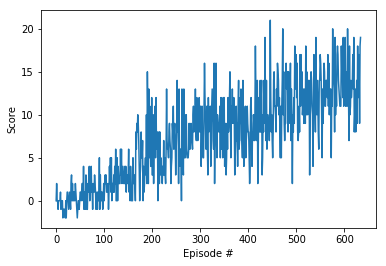

In [4]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode = True)[brain_name]
        state = env_info.vector_observations[0] #extract the current state of the environment
        score = 0 # initialize the score
        for t in range(max_t): # loop for max number of timesteps in an episode
            action = agent.act(state, eps) # choose and action using an e-greedy policy
            env_info = env.step(action)[brain_name] # peform that action on the environment
            next_state, reward, done = env_info.vector_observations[0],env_info.rewards[0],env_info.local_done[0] # extract the next_state,reward and termination condition from the environment
            agent.step(state, action, reward, next_state, done) # update the agents Q-network
            state = next_state # update the state information
            score += reward # accumalate the reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
